### 모듈 임포트, 파일 불러오기, 컬럼 미리 보기

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

rc("font", family="Arial Unicode MS")
plt.rcParams["axes.unicode_minus"] = False 

In [389]:
df = pd.read_csv("/Users/anmunju/Documents/ds_study/assignment/data_211027/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1", low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
col_list=list(df.columns.unique())
col_list

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

# 문제 1) 연도별 테러 숫자 시각화

- 연도 iyear
- 테러 횟수 eventid의 갯수

In [9]:
# t_df : 테러 데이터프레임
t_df=df[['iyear', 'eventid']]
t_df

,iyear,eventid
0,1970,197000000001
1,1970,197000000002
2,1970,197001000001
3,1970,197001000002
4,1970,197001000003
...,...,...
181686,2017,201712310022
181687,2017,201712310029
181688,2017,201712310030
181689,2017,201712310031


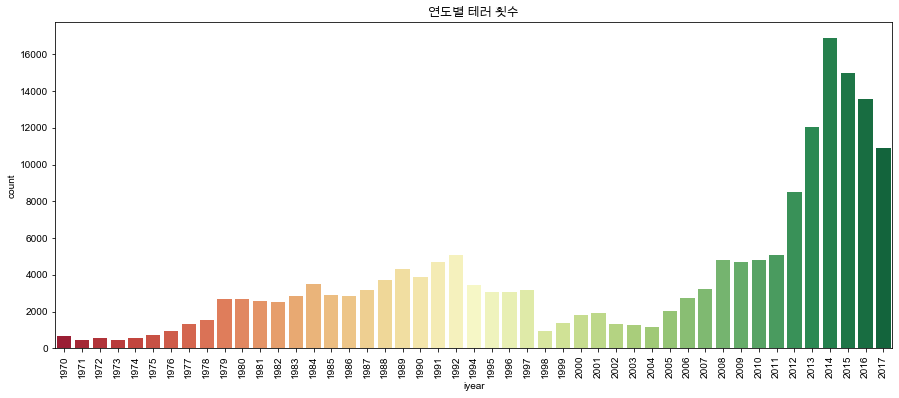

In [10]:
plt.figure(figsize=(15, 6))
sns.countplot(
    t_df["iyear"], 
    data=t_df, 
    palette="RdYlGn"
)
plt.xticks(rotation=90)
plt.title("연도별 테러 횟수")
plt.show()

- 위 그래프를 살펴보면 2012~2014년에 급격히 증가하는 모습이다.
- 2012년~2014년의 데이터 중 어떤 사고가 가장 많이 일어났는지 알아보자

In [604]:
# a_df : 2012~2014년 테러 종류 정보가 포함된 데이터프레임
a=df[['iyear', 'attacktype1_txt']]
a_df = a[(a['iyear'] == 2012) | (a['iyear'] == 2013) | (a['iyear'] == 2014)]
a_df.reset_index(drop=True, inplace=True)

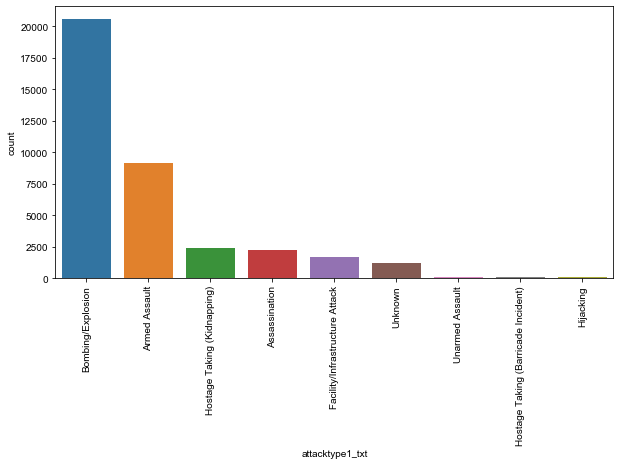

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(
    a_df["attacktype1_txt"], 
    data=a_df,
    order=a_df["attacktype1_txt"].value_counts().index
)
plt.xticks(rotation=90)
plt.show()

In [13]:
a_cnt = pd.pivot_table(a_df, index=['iyear'], aggfunc = 'count')
a_cnt

,attacktype1_txt
iyear,
2012,8522
2013,12036
2014,16903


- 2012~2014년 데이터에서 가장 많이 일어난 attacktype은 Bombing/Explosion(폭격/폭발)이다. 
    - 다른 타입보다 2배이상 높은 것을 시각적으로 확인할 수 있다.
- 12년에서 13년으로의 증가폭과 13년에서 14년의 증가폭이 비슷하다.
    - 13년을 기준으로 앞 뒤의 현황을 문제 5번에서 분석해보도록 하자.



  
<관련 뉴스> 연합뉴스 연도별 세계 10대 뉴스 출처
  
■계속되는 중동 혼란 (2012) : https://www.yna.co.kr/view/AKR20121219082400009  
지난해 중동·북아프리카의 여러 국가가 독재정권을 무너뜨리고 '아랍의 봄'을 맞이했으나 새로운 질서 구축의 길은 멀고 험난했다.  
1년 9개월간 내전으로 4만명 넘게 사망한 시리아는 국제사회의 중재에도 정부군과 반군 간의 교전이 끊이지 않았다...  
  
■ 이집트군 무르시 축출과 유혈 사태 (2013) : https://www.yna.co.kr/view/AKR20131213149600009  
이집트 군부가 지난 7월3일 이슬람주의자인 무함마드 무르시 전 대통령을 강제 축출했다.  
군부는 국민 다수의 뜻을 받들어 실정한 무르시를 집권 1년만에 축출했다고 밝혔지만 무르시와 무슬림형제단은 '군사 쿠데타'라며 반발했다.  
무르시 정권 붕괴 후 이집트에서는 국론 분열과 반군부 시위, 무르시 찬반 세력 충돌로 혼란이 이어지고 있다. 군경이 무르시 지지 시위대를 무력 진압하는 과정에서 1천명 이상이 숨졌다...  

■ IS 이라크·시리아서 득세…서방인 참수·미군 공습 (2014) : https://www.yna.co.kr/view/AKR20141210113000009  
알카에다의 이라크지부(AQI)였던 이슬람국가(IS)는 시아파 주도의 편파적 정책에 소외된 수니파를 규합하고 시리아의 수니파 무장단체를 흡수, 올해 초 순식간에 중동 정세를 위협하는 세력으로 부상했다.  
'ISIL'(이라크-레반트 이슬람국가) 또는 'ISIS'(이라크-시리아 이슬람국가)로 불리던 조직은 6월 29일 신정일치 국가인 '이슬람국가'(IS) 설립을 선언했다.  
IS는 6월 이라크 제2도시 모술을 점령하는 등 수니파가 주로 거주하는 이라크 서북부와 시리아 동부를 장악했다.  
이들은 특히 서방을 침략자로 규정, 8월19일 미국 언론인 제임스 폴리를 시작으로 미국인 3명과 영국인, 프랑스인 1명 등 모두 5명의 참수 동영상을 공개했다.  
미국은 이에 맞서 19개국으로 구성된 국제동맹군을 결성, 8월8일부터 IS를 공습했다...  
  

# 문제 2) 테러가 많이 일어난 상위 10위 국가

- 국가 contry(숫자), country_txt(이름)
- 테러 횟수 eventid의 갯수

In [605]:
# t_contry_df : 테러 나라별 데이터프레임
t_contry_df=df[['eventid', 'country_txt']]
t_contry_pivot = pd.pivot_table(t_contry_df, index=['country_txt'], aggfunc = 'count')
t_contry_10=t_contry_pivot.sort_values(by='eventid', ascending=False)[:10]
t_contry_10.reset_index(inplace=True)
t_contry_10

,country_txt,eventid
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


- 이라크, 파키스탄, 아프가니스탄 등 10개의 국가별 테러 발생 횟수를 알아보았다.
- 테러 발생 상위 10개 국가를 그래프로 확인해보자

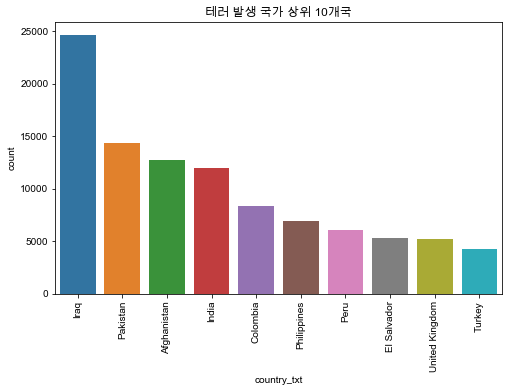

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(
    t_contry_df["country_txt"], 
    data=t_contry_df,
    order=t_contry_df["country_txt"].value_counts().index[:10]
)
plt.xticks(rotation=90)
plt.title("테러 발생 국가 상위 10개국")
plt.show()

- 상위 10개 국가를 시각화 한 그래프이다.
    - 이라크, 파키스탄, 아프가니스탄, 인도, 콜롬비아, 필리핀, 페루, 엘살바도르, 영국, 터키 순으로 테러가 많이 발생하는 것을 알 수 있다.
    - 이라크가 다른 나라에 비해 유난히 높은 수치를 보이는 것을 확인할 수 있다.

# 문제3) 테러 상위 10개국의 사망자 수, 부상자 수 시각화
- 10개국 : 이럽, 파키스탄, 아프가니스탄, 인도, 콜롬비아, 필리핀, 페루, EI 실바도르, 영국, 터키
- 사망자수 nkill
- 부상자수 nwound

### [10개국의 사망자수와 부상자수]

In [154]:
# n_df : 사망자수 부상자수 정보를 포함하는 데이터프레임
n_df=df[['country_txt', 'nkill', 'nwound']]
n_df = n_df.fillna(0)
n_df['cnt'] = 1 #이벤트 갯수를 count
n_df

,country_txt,nkill,nwound,cnt
0,Dominican Republic,1.0,0.0,1
1,Mexico,0.0,0.0,1
2,Philippines,1.0,0.0,1
3,Greece,0.0,0.0,1
4,Japan,0.0,0.0,1
...,...,...,...,...
181686,Somalia,1.0,2.0,1
181687,Syria,2.0,7.0,1
181688,Philippines,0.0,0.0,1
181689,India,0.0,0.0,1


In [156]:
# n_cnt : 테러발생건수, 사망자수, 부상자수 합계 pivoting
n_cnt = pd.pivot_table(data=n_df, index=['country_txt'], aggfunc = 'sum')
n_cnt.reset_index(inplace=True)
n_cnt

,country_txt,cnt,nkill,nwound
0,Afghanistan,12731,39384.0,44277.0
1,Albania,80,42.0,126.0
2,Algeria,2743,11066.0,9150.0
3,Andorra,1,0.0,0.0
4,Angola,499,3043.0,2455.0
...,...,...,...,...
200,Yemen,3347,8776.0,9328.0
201,Yugoslavia,203,119.0,281.0
202,Zaire,50,324.0,211.0
203,Zambia,62,70.0,62.0


In [606]:
# 테러 상위 10개국 리스트
t_10_list=list(t_contry_10.country_txt)
print(t_10_list)

['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey']


In [271]:
# 테러 상위 10개 나라 데이터 프레임 : 사건발생수, 사망자, 부상자, 사상자
t_n=n_cnt['country_txt'].isin(t_10_list)
t_10_df = n_cnt[t_n].sort_values(by='nkill',ascending=False)
t_10_df.reset_index(inplace=True, drop=True)
t_10_df['ncasualty']=t_10_df['nkill']+t_10_df['nwound']
t_10_df

,country_txt,cnt,nkill,nwound,ncasualty
0,Iraq,24636,78589.0,134690.0,213279.0
1,Afghanistan,12731,39384.0,44277.0,83661.0
2,Pakistan,14368,23822.0,42038.0,65860.0
3,India,11960,19341.0,28980.0,48321.0
4,Colombia,8306,14698.0,10328.0,25026.0
5,Peru,6096,12771.0,4078.0,16849.0
6,El Salvador,5320,12053.0,5062.0,17115.0
7,Philippines,6908,9559.0,13367.0,22926.0
8,Turkey,4292,6888.0,9899.0,16787.0
9,United Kingdom,5235,3410.0,6106.0,9516.0


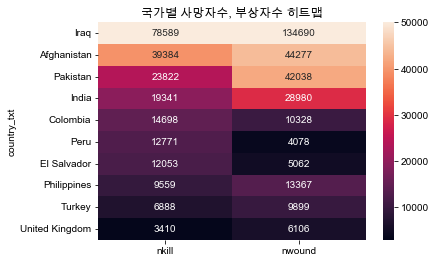

In [607]:
t_10_visualize=t_10_df.iloc[:,[0,2,3]]
t_10_visualize.set_index(keys="country_txt",inplace=True)
sns.heatmap(t_10_visualize, annot=True, fmt='.0f', vmin = 3000, vmax = 50000)
plt.title("국가별 사망자수, 부상자수 히트맵")
plt.show()

- 국가별 사망자 수와 부상자 수를 한눈에 비교할 수 있는 히트맵을 작성했다.

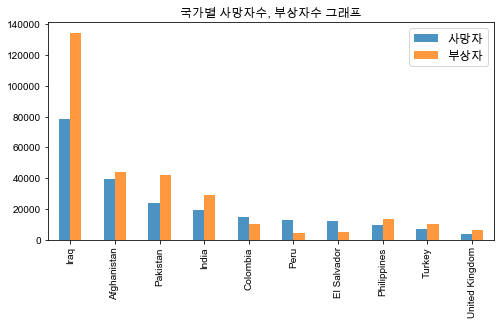

In [161]:
t_10_df.plot(x='country_txt', y=['nkill','nwound'], kind='bar', alpha=0.8, figsize=(8,4))
plt.xlabel("")
plt.legend(('사망자', '부상자'), fontsize=12)
plt.title("국가별 사망자수, 부상자수 그래프")
plt.show()

- 동일한 내용을 막대 그래프로 작성했다.  

```
두 그래프를 살펴본 결과
- 아프가니스탄과 파키스탄, 인도, 필리핀, 터키, 영국은 사망자 수에 비해 부상자의 수가 많다.
- 반대로 콜롬비아, 페루, 엘셀바도르는 부상자 수에 비해 사망자 수가 많다는 것을 알 수 있다.
```

---
  
### [10개국의 사건 발생과 사상자 수]

In [608]:
# 국가별 사건 발생 수, 사상자 수, 시상자/사건(비율)
t_event_casualy=t_10_df.iloc[:,[0,1,4]]
t_event_casualy['rate'] = t_event_casualy['ncasualty'] / t_event_casualy['cnt']
t_event_casualy

/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_6791/958878370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_event_casualy['rate'] = t_event_casualy['ncasualty'] / t_event_casualy['cnt']


,country_txt,cnt,ncasualty,rate
0,Iraq,24636,213279.0,8.657209
1,Afghanistan,12731,83661.0,6.571440
2,Pakistan,14368,65860.0,4.583797
3,India,11960,48321.0,4.040217
4,Colombia,8306,25026.0,3.013003
5,Peru,6096,16849.0,2.763944
6,El Salvador,5320,17115.0,3.217105
7,Philippines,6908,22926.0,3.318761
8,Turkey,4292,16787.0,3.911230
9,United Kingdom,5235,9516.0,1.817765


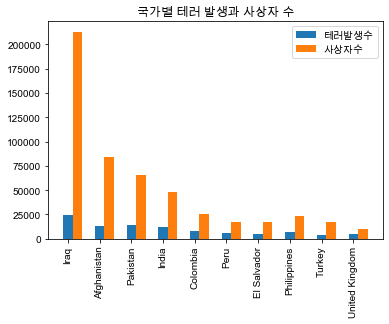

In [609]:
# 국가별 테러 발생과 사상자 수 시각화
plt.bar(t_event_casualy.index-0.0, t_event_casualy.cnt, width=0.3, label='테러발생수')
plt.bar(t_event_casualy.index+0.3, t_event_casualy.ncasualty, width=0.3, label='사상자수')
plt.xticks(t_event_casualy.index, t_event_casualy.country_txt, rotation=90)
plt.legend()
plt.title("국가별 테러 발생과 사상자 수")
plt.show()

- 사건 발생자수와 사상자 수를 눈으로 확인하면 다음과 같다.
- 아래에서 사상자 수에서 사건 발생 수를 나눠 테러 발생 건수 대비 사상자는 얼마나 나타나는지 확인하고자 한다.

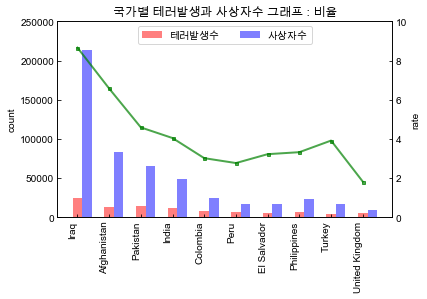

In [610]:
# 테러 발생과 사상자 수 비율 포함 그래프
fig, ax1 = plt.subplots()

ax1.bar(t_event_casualy.index-0.0, t_event_casualy.cnt, color='red', label='테러발생수', alpha=0.5, width=0.3)
ax1.bar(t_event_casualy.index+0.3, t_event_casualy.ncasualty, color='blue', label='사상자수', alpha=0.5, width=0.3)
ax1.set_ylim(0, 250000)
ax1.set_xlabel('')
ax1.set_ylabel('count')
ax1.tick_params(axis='both', direction='in')
ax1.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))

ax2 = ax1.twinx()
ax2.plot(t_event_casualy.country_txt, t_event_casualy.rate, '-s', color='green', markersize=3, linewidth=2, alpha=0.7, label='비율')
ax2.set_ylim(0, 10)
ax2.set_ylabel('rate')
ax2.tick_params(axis='y', direction='in')

plt.title("국가별 테러발생과 사상자수 그래프 : 비율")
fig.autofmt_xdate(rotation=90)
plt.show()


- 대부분의 국가들이 사건 발생수보다 적어도 2배 이상 높은 사상자수를 보여주고 있다.
- 이라크는 특히 가장 높은 사상자수 비율을 보이고 있다.
    - 이는 테러 한건이 발생할 때 가장 많은 비율로 사상자가 발생한다는 것을 의미한다.

# 문제4) 대륙별 지역 구분 후 지역별 특성 확인
- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분
- 테러 공격 형태, 사망자, 사상자 수 등 특성 확인

### [terror 데이터 프레임 만들기]
 
    - 년도 iyear
    - 나라별 구분 country_txt
    - 대륙 구분 region_txt
    - 테러 공격 형태 attacktype1_txt
    - 사망자수 nkill
    - 부상자수 nwound
    - 피해자 유형 targtype1_txt
    - 테러시 사용한 도구 weaptype1_txt
    - 동기 motive

In [176]:
# terror 데이터 프레임 생성
terror=df[['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'nkill', 'nwound', \
    'targtype1_txt', 'weaptype1_txt', 'motive' ]]
terror['nkill']=terror['nkill'].fillna(0)
terror['nwound']=terror['nwound'].fillna(0)
terror["ncasualty"] = terror['nkill'] + terror['nwound']

# 필요한 지역만 추리기
terror = terror[(terror["region_txt"]=='Middle East & North Africa') | \
                (terror["region_txt"]=='South Asia') | \
                (terror["region_txt"]=='South America') | \
                (terror["region_txt"]=='Western Europe') | \
                (terror["region_txt"]=='Southeast Asia') | \
                (terror["region_txt"]=='Eastern Europe') | \
                (terror["region_txt"]=='North America') | \
                (terror["region_txt"]=='East Asia') ]
terror['cnt'] = 1 #이벤트 갯수 셀때 필요한열
terror

/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_6791/1093241987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror['nkill']=terror['nkill'].fillna(0)
/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_6791/1093241987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror['nwound']=terror['nwound'].fillna(0)
/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_6791/1093241987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,iyear,country_txt,region_txt,attacktype1_txt,nkill,nwound,targtype1_txt,weaptype1_txt,motive,ncasualty,cnt
1,1970,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),Unknown,NaN,0.0,1
2,1970,Philippines,Southeast Asia,Assassination,1.0,0.0,Journalists & Media,Unknown,NaN,1.0,1
3,1970,Greece,Western Europe,Bombing/Explosion,0.0,0.0,Government (Diplomatic),Explosives,NaN,0.0,1
4,1970,Japan,East Asia,Facility/Infrastructure Attack,0.0,0.0,Government (Diplomatic),Incendiary,NaN,0.0,1
5,1970,United States,North America,Armed Assault,0.0,0.0,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,Afghanistan,South Asia,Bombing/Explosion,0.0,4.0,Business,Explosives,NaN,4.0,1
181687,2017,Syria,Middle East & North Africa,Bombing/Explosion,2.0,7.0,Military,Explosives,NaN,9.0,1
181688,2017,Philippines,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,Incendiary,NaN,0.0,1
181689,2017,India,South Asia,Bombing/Explosion,0.0,0.0,Government (General),Explosives,NaN,0.0,1


In [183]:
# 지역별 합계 데이터프레임 : terror_cnt
terror_cnt = pd.pivot_table(terror, index=['region_txt'], aggfunc = 'sum')
terror_cnt.reset_index(inplace=True)
terror_cnt

,region_txt,cnt,iyear,ncasualty,nkill,nwound
0,East Asia,802,1599842,10365.0,1152.0,9213.0
1,Eastern Europe,5144,10324011,19460.0,7415.0,12045.0
2,Middle East & North Africa,50474,101364933,351950.0,137642.0,214308.0
3,North America,3456,6863717,26447.0,4916.0,21531.0
4,South America,18978,37773082,45553.0,28849.0,16704.0
5,South Asia,44974,90336283,242679.0,101319.0,141360.0
6,Southeast Asia,12485,25052137,41896.0,15637.0,26259.0
7,Western Europe,16639,33097736,25026.0,6694.0,18332.0


### [대륙 구분 및 특성 확인]

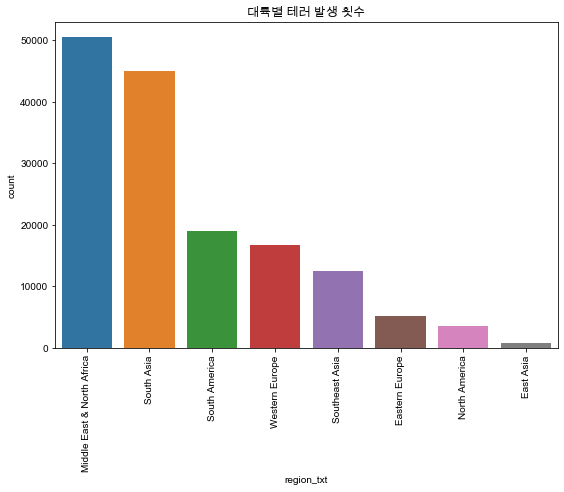

In [611]:
# 대륙별 테러 발생 횟수 시각화
plt.figure(figsize=(9, 6))
sns.countplot('region_txt',data=terror,order=terror['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('대륙별 테러 발생 횟수')
plt.show()

- 테러발생은 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역 순으로 많이 일어난다.

In [185]:
terror.columns

Index(['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'nkill',
       'nwound', 'targtype1_txt', 'weaptype1_txt', 'motive', 'ncasualty',
       'cnt'],
      dtype='object')

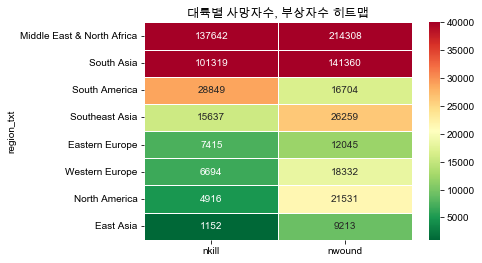

In [619]:
# 대륙별 사망자수, 부상자수 히트맵 

terror_heat =pd.pivot_table(terror.loc[:,['region_txt', 'nkill', 'nwound']], index=['region_txt'],aggfunc = 'sum')
terror_heat.sort_values(by='nkill', ascending=False, inplace=True)
sns.heatmap(terror_heat, annot=True, fmt='.0f', linewidths=.5, vmin = 1000, vmax = 40000, cmap='RdYlGn_r')
plt.title("대륙별 사망자수, 부상자수 히트맵")
plt.show()

- 대륙별 사망자수와 부상자수를 히트맵으로 시각화했다.
    - 중동&북아프리카와, 남아시아가 다른 대륙과 큰 차이로 높아 가장 진한 빨간색으로 표시되어 있다.
    - 남아메리카만 다른 대륙과 달리 부상자보다 사망자 수가 더 많다.

In [621]:
# 사망자와 사상자수, 사망자/사상자(비율) 정보 추가 데이터프레임
t_kill_casualty=terror_cnt.loc[:,['region_txt', 'nkill', 'ncasualty']]
t_kill_casualty['rate'] = t_kill_casualty['nkill'] / t_kill_casualty['ncasualty']
t_kill_casualty.sort_values(by='ncasualty', ascending=False, inplace=True)
t_kill_casualty.reset_index(drop=True, inplace=True)
t_kill_casualty

,region_txt,nkill,ncasualty,rate
0,Middle East & North Africa,137642.0,351950.0,0.391084
1,South Asia,101319.0,242679.0,0.417502
2,South America,28849.0,45553.0,0.633306
3,Southeast Asia,15637.0,41896.0,0.373234
4,North America,4916.0,26447.0,0.185881
5,Western Europe,6694.0,25026.0,0.267482
6,Eastern Europe,7415.0,19460.0,0.381038
7,East Asia,1152.0,10365.0,0.111143


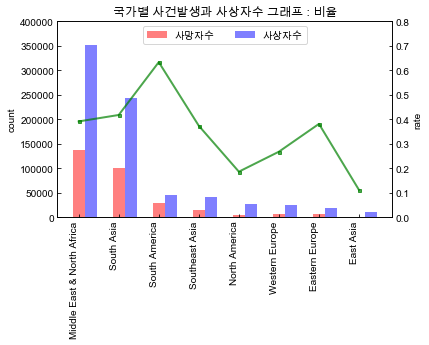

In [623]:
# 사망자와 사상자 수 + 비율 시각화
fig, ax1 = plt.subplots()

ax1.bar(t_kill_casualty.index-0.0, t_kill_casualty.nkill, color='red', label='사망자수', alpha=0.5, width=0.3)
ax1.bar(t_kill_casualty.index+0.3, t_kill_casualty.ncasualty, color='blue', label='사상자수', alpha=0.5, width=0.3)
ax1.set_ylim(0, 400000)
ax1.set_xlabel('')
ax1.set_ylabel('count')
ax1.tick_params(axis='both', direction='in')
ax1.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))

ax2 = ax1.twinx()
ax2.plot(t_kill_casualty.region_txt, t_kill_casualty.rate, '-s', color='green', markersize=3, linewidth=2, alpha=0.7, label='비율')
ax2.set_ylim(0, 0.8)
ax2.set_ylabel('rate')
ax2.tick_params(axis='y', direction='in')

plt.title("국가별 사건발생과 사상자수 그래프 : 비율")
fig.autofmt_xdate(rotation=90)
plt.show()


- 이번에는 사망자/사상자를 나누어 사망자의 비율이 얼마나 높은지 그래프로 표현했다.
    - 남아메리카는 다른 대륙에 비해 사망자 비율이 높은 편이다. (약 63%)
    - 동아시아는 사망자, 사상자의 수도 작고 사망자 비율도 가장 낮다. (약 11%)

---

### [테러의 공격형태와 테러 방법]

In [294]:
# 테러 공격 형태
terror.attacktype1_txt.unique()

array(['Hostage Taking (Kidnapping)', 'Assassination',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [295]:
# terror_attack: 지역, 테러 방법, 타겟
terror_attack = terror[['region_txt','attacktype1_txt','targtype1_txt']]
terror_attack

,region_txt,attacktype1_txt,targtype1_txt
1,North America,Hostage Taking (Kidnapping),Government (Diplomatic)
2,Southeast Asia,Assassination,Journalists & Media
3,Western Europe,Bombing/Explosion,Government (Diplomatic)
4,East Asia,Facility/Infrastructure Attack,Government (Diplomatic)
5,North America,Armed Assault,Police
...,...,...,...
181685,South Asia,Bombing/Explosion,Business
181687,Middle East & North Africa,Bombing/Explosion,Military
181688,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property
181689,South Asia,Bombing/Explosion,Government (General)


In [296]:
# terror_attack_cnt : 지역별 테러 방법 cnt
terror_attack_cnt = pd.pivot_table(terror_attack, index=['region_txt'], columns='attacktype1_txt', aggfunc = 'count')
terror_attack_cnt.columns = terror_attack_cnt.columns.droplevel([0])
terror_attack_cnt

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
East Asia,117,55,330,200,18,3,14,42,23
Eastern Europe,1274,400,2766,260,26,21,220,62,115
Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891
North America,448,255,1534,906,18,67,123,73,32
South America,3875,2745,9039,803,67,234,1414,47,754
South Asia,11404,4301,21246,2189,93,120,3277,323,2021
Southeast Asia,4022,1369,4818,948,59,67,744,25,433
Western Europe,1724,2938,8508,2631,67,89,269,148,265


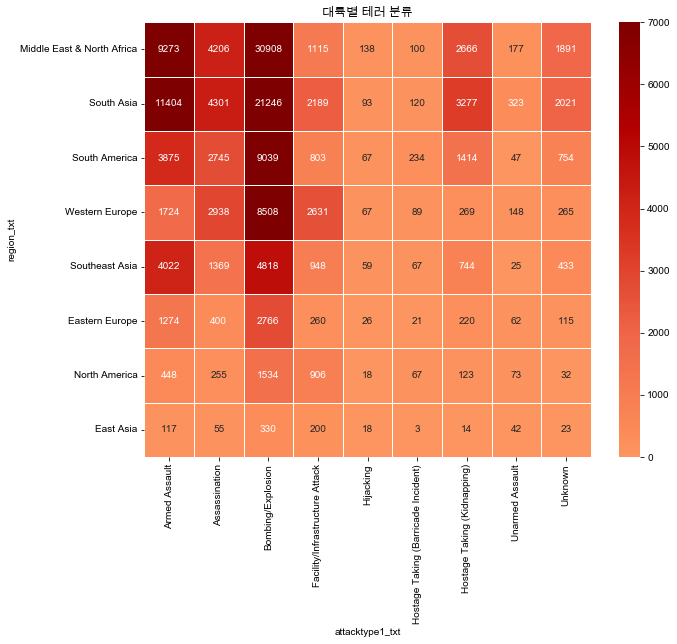

In [408]:
# 대륙별 테러 분류 시각화
terror_attack_cnt.sort_values(by='Bombing/Explosion', ascending=False, inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(terror_attack_cnt, cmap="OrRd", annot=True, fmt=".0f", linewidths=.5, vmin = 0, vmax = 7000, center=300)
plt.title("대륙별 테러 분류")
plt.show()

- 다른 테러 종류보다 폭발 테러가 전반적으로 가장 진한 모습을 보임. 
- 다음은 무장 테러가 빈번하게 발생하는 것으로 보임

In [409]:
# terror_target_cnt : 대륙별 타겟 분류 cnt
terror_target_cnt = pd.pivot_table(terror_attack, index=['region_txt'], columns='targtype1_txt', aggfunc = 'count')
terror_target_cnt.columns = terror_target_cnt.columns.droplevel([0])
terror_target_cnt.fillna(0).round(0).astype(int).style.background_gradient(cmap='summer')

targtype1_txt,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,NGO,Other,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
region_txt,,,,,,,,,,,,,,,,,,,,,,
East Asia,0,59,102,14,1,34,128,18,4,40,2,0,98,97,32,5,5,3,148,5,5,2
Eastern Europe,0,31,434,59,9,136,696,126,0,1136,38,5,876,862,177,16,18,9,295,128,86,7
Middle East & North Africa,0,277,4158,819,54,800,4256,681,56,9269,135,83,6893,15257,1263,71,1701,146,1186,2160,812,397
North America,258,57,905,178,8,183,414,121,8,211,34,2,235,468,170,10,8,12,38,15,104,17
South America,1,146,3494,354,80,390,2849,583,30,1770,59,1,2256,3152,349,144,78,39,1080,165,1930,28
South Asia,0,174,3123,1781,63,302,5463,438,49,5696,296,17,8471,10491,1141,303,697,50,2112,2402,799,1106
Southeast Asia,0,50,1727,409,23,124,1967,166,74,2288,43,9,1348,2501,341,156,78,34,461,292,382,12
Western Europe,4,331,4209,178,14,675,2157,292,24,1383,47,11,2139,3350,308,83,267,93,448,377,191,58


# 문제5) 대륙별로 특정 시기를 기준으로 분리해 테러 양상 분석
- 2013년을 기준으로 분리해 테러 양상 분석

### [데이터 프레임 만들기]

In [338]:
# 연도별 합계 데이터프레임 : iyear_region
iyear_region = pd.pivot_table(terror, index=['iyear','region_txt'], aggfunc = 'sum')
iyear_region.reset_index(inplace=True)
iyear_region['rate'] = iyear_region['ncasualty'] / iyear_region['cnt']
iyear_region

,iyear,region_txt,cnt,ncasualty,nkill,nwound,rate
0,1970,East Asia,2,0.0,0.0,0.0,0.000000
1,1970,Eastern Europe,12,0.0,0.0,0.0,0.000000
2,1970,Middle East & North Africa,28,6.0,1.0,5.0,0.214286
3,1970,North America,472,194.0,34.0,160.0,0.411017
4,1970,South America,65,15.0,11.0,4.0,0.230769
...,...,...,...,...,...,...,...
366,2017,North America,97,1087.0,124.0,963.0,11.206186
367,2017,South America,172,257.0,101.0,156.0,1.494186
368,2017,South Asia,3430,16654.0,7664.0,8990.0,4.855394
369,2017,Southeast Asia,1020,1819.0,811.0,1008.0,1.783333


In [377]:
# bef_iyear_region, aft_iyear_region 으로 구분
bef_iyear_region=iyear_region[iyear_region["iyear"] < 2013]
aft_iyear_region=iyear_region[iyear_region["iyear"] >= 2013]

In [376]:
# 테러 방법, 대상의 정보가 담긴 데이터 프레임
terror_attack_2 = terror[['iyear','region_txt','attacktype1_txt','targtype1_txt']]
terror_attack_2

,iyear,region_txt,attacktype1_txt,targtype1_txt
1,1970,North America,Hostage Taking (Kidnapping),Government (Diplomatic)
2,1970,Southeast Asia,Assassination,Journalists & Media
3,1970,Western Europe,Bombing/Explosion,Government (Diplomatic)
4,1970,East Asia,Facility/Infrastructure Attack,Government (Diplomatic)
5,1970,North America,Armed Assault,Police
...,...,...,...,...
181685,2017,South Asia,Bombing/Explosion,Business
181687,2017,Middle East & North Africa,Bombing/Explosion,Military
181688,2017,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property
181689,2017,South Asia,Bombing/Explosion,Government (General)


In [475]:
# bef_terror_attack, aft_terror_attack 으로 구분
bef_terror_attack=terror_attack_2[terror_attack_2["iyear"] < 2013]
aft_terror_attack=terror_attack_2[terror_attack_2["iyear"] >= 2013]

In [ ]:
# largest_terror_target : 테러 타겟 10위
largest_terror_target =list(pd.pivot_table(terror_attack_2, index='region_txt', columns='targtype1_txt', values='iyear', aggfunc = 'count').sum().sort_values(ascending=False)[:10].index)
largest_terror_target, len(largest_terror_target)

(['Private Citizens & Property',
  'Police',
  'Military',
  'Business',
  'Government (General)',
  'Transportation',
  'Unknown',
  'Utilities',
  'Educational Institution',
  'Religious Figures/Institutions'],
 10)

In [ ]:
bef_terror_target = bef_terror_attack.loc[bef_terror_attack['targtype1_txt'].isin(largest_terror_target)]
aft_terror_target = aft_terror_attack.loc[aft_terror_attack['targtype1_txt'].isin(largest_terror_target)]

### [전체 기간 발생 테러 사건 횟수]

In [364]:
# 전체 기간에 발생한 테러 사건 횟수 시각화
iyear_region.pivot(index='iyear', columns='region_txt',values='cnt').fillna(0).round(0).astype(int).style.background_gradient(cmap='PuBuGn')

region_txt,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Western Europe
iyear,,,,,,,,
1970,2,12,28,472,65,1,10,50
1971,1,5,55,247,24,0,6,125
1972,0,1,53,73,33,1,16,376
1973,2,1,19,64,83,1,2,290
1974,4,2,42,111,81,2,3,317
1975,12,0,44,159,55,4,7,438
1976,2,0,55,125,91,4,12,578
1977,4,2,211,149,119,2,8,771
1978,35,2,128,117,222,2,44,729


### [2013년 이전 발생한 테러]

In [372]:
# 2014년을 기점으로 전에 발생한 테러의 사상자수 시각화
bef_iyear_region.pivot(index='iyear', columns='region_txt',values='ncasualty').fillna(0).round(0).astype(int).style.background_gradient(cmap='GnBu')

region_txt,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Western Europe
iyear,,,,,,,,
1970,0,0,6,194,15,24,54,89
1971,25,0,18,75,6,0,12,118
1972,0,26,116,53,7,0,85,687
1973,0,8,25,79,35,1,8,702
1974,8,1,249,72,50,2,5,1009
1975,2,0,152,219,146,6,49,494
1976,3,0,433,76,240,4,120,443
1977,0,8,158,47,89,1,174,396
1978,57,5,1312,41,144,7,377,565


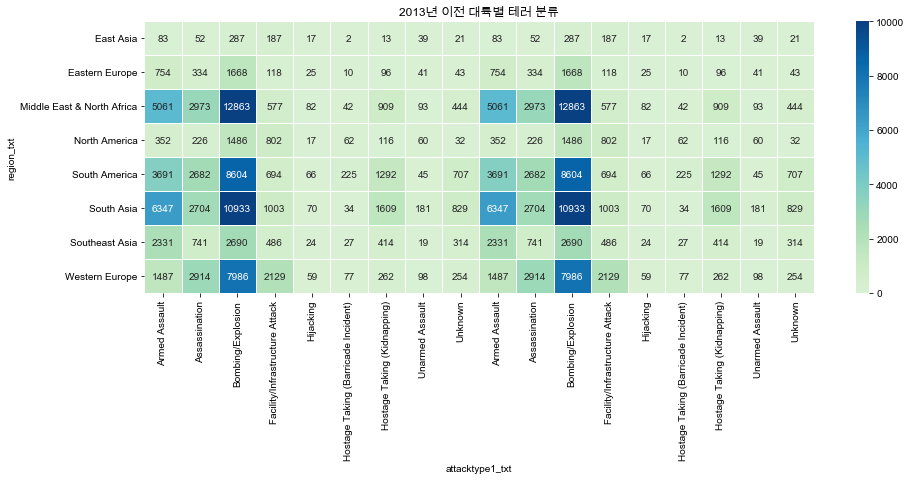

In [445]:
# bef_terror_attack_cnt : 2013년 이전 대륙별 테러 방법 cnt
bef_terror_attack_cnt = pd.pivot_table(bef_terror_attack, index=['region_txt'], columns='attacktype1_txt', aggfunc = 'count')
bef_terror_attack_cnt.columns = bef_terror_attack_cnt.columns.droplevel([0])

plt.figure(figsize=(15,5))
sns.heatmap(bef_terror_attack_cnt, cmap="GnBu", annot=True, fmt=".0f", linewidths=.5, vmin = 0, vmax = 10000, center=4000)
plt.title("2013년 이전 대륙별 테러 분류")
plt.show()


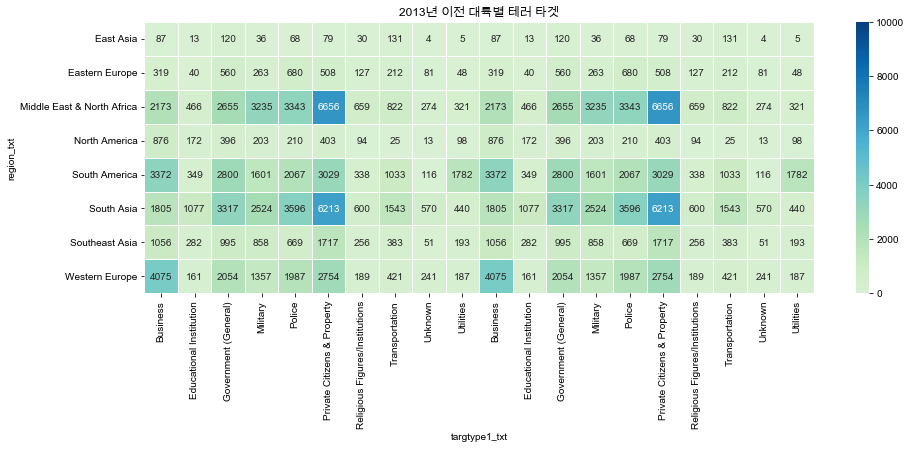

In [529]:
# bef_terror_target_cnt : 2013년 이전 대륙별 테러 타겟 (10위) cnt
bef_terror_target_cnt = pd.pivot_table(bef_terror_target, index=['region_txt'], columns='targtype1_txt', aggfunc = 'count')
bef_terror_target_cnt.columns = bef_terror_target_cnt.columns.droplevel([0])

plt.figure(figsize=(15,5))
sns.heatmap(bef_terror_target_cnt, cmap="GnBu", annot=True, fmt=".0f", linewidths=.5, vmin = 0, vmax = 10000, center=4000)
plt.title("2013년 이전 대륙별 테러 타겟")
plt.show()


### [2013년 이후 발생한 테러]

In [373]:
# 2014년을 기점으로 이후에 발생한 테러의 사상자수 시각화
aft_iyear_region.pivot(index='iyear', columns='region_txt',values='ncasualty').fillna(0).round(0).astype(int).style.background_gradient(cmap='OrRd')

region_txt,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Western Europe
iyear,,,,,,,,
2013,131,447,31660,616,452,18168,2115,92
2014,800,2796,42681,61,512,17819,2153,36
2015,207,2223,41611,133,273,18533,2032,697
2016,76,219,42638,246,266,17080,1859,1138
2017,93,284,19211,1087,257,16654,1819,592


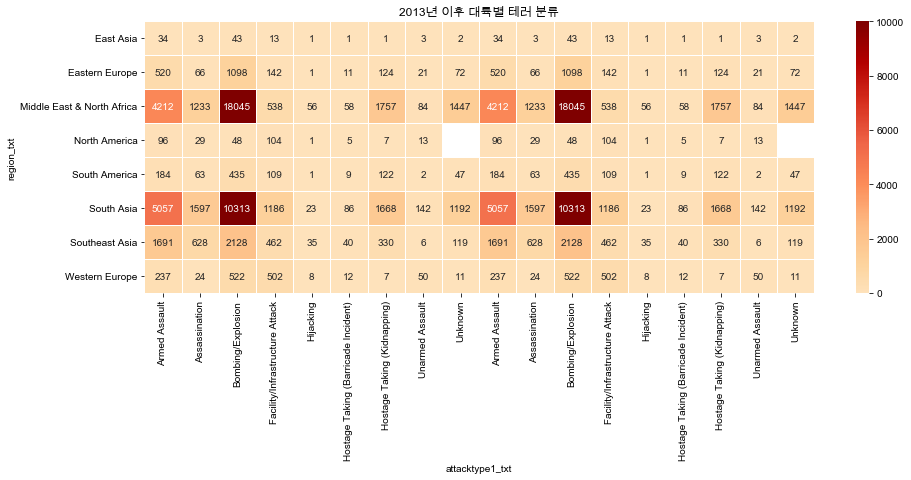

In [431]:
# aft_terror_attack_cnt : 2013년 이후 대륙별 테러 방법 cnt
aft_terror_attack_cnt = pd.pivot_table(aft_terror_attack, index=['region_txt'], columns='attacktype1_txt', aggfunc = 'count')
aft_terror_attack_cnt.columns = aft_terror_attack_cnt.columns.droplevel([0])

plt.figure(figsize=(15,5))
sns.heatmap(aft_terror_attack_cnt, cmap="OrRd", annot=True, fmt=".0f", linewidths=.5, vmin = 0, vmax = 10000, center=4000)
plt.title("2013년 이후 대륙별 테러 분류")
plt.show()


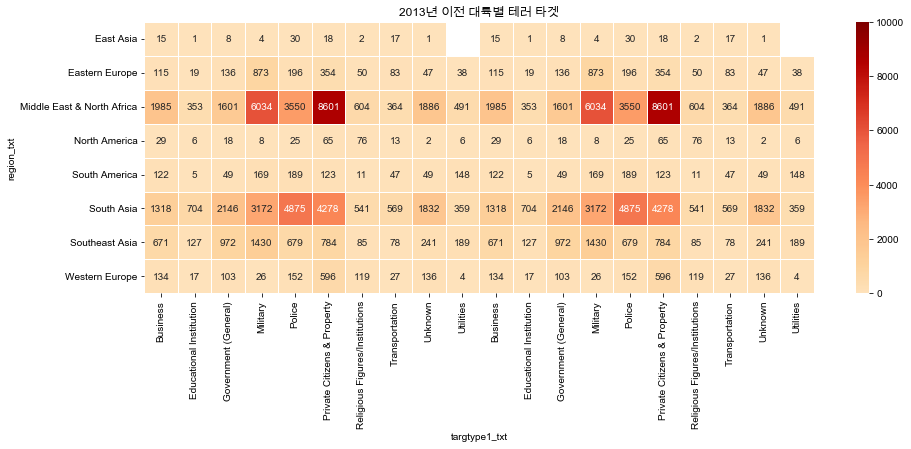

In [532]:
# aft_terror_target_cnt : 2013년 이후 대륙별 테러 타겟 (10위) cnt
aft_terror_target_cnt = pd.pivot_table(aft_terror_target, index=['region_txt'], columns='targtype1_txt', aggfunc = 'count')
aft_terror_target_cnt.columns = aft_terror_target_cnt.columns.droplevel([0])

plt.figure(figsize=(15,5))
sns.heatmap(aft_terror_target_cnt, cmap="OrRd", annot=True, fmt=".0f", linewidths=.5, vmin = 0, vmax = 10000, center=4000)
plt.title("2013년 이전 대륙별 테러 타겟")
plt.show()


# 문제 7) 우리나라 테러 집계 후 시각화 및 분석

### [한국 데이터 정리]

In [545]:
kor_terror = terror[terror.country_txt=="South Korea"].reset_index(drop=True)
kor_terror.tail()

,iyear,country_txt,region_txt,attacktype1_txt,nkill,nwound,targtype1_txt,weaptype1_txt,motive,ncasualty,cnt
33,2001,South Korea,East Asia,Bombing/Explosion,0.0,2.0,Business,Explosives,Unknown,2.0,1
34,2003,South Korea,East Asia,Armed Assault,0.0,60.0,Police,Incendiary,The protestors wanted to keep a nuclear waste ...,60.0,1
35,2006,South Korea,East Asia,Armed Assault,0.0,1.0,Government (General),Melee,To 'save democracy.',1.0,1
36,2015,South Korea,East Asia,Assassination,0.0,1.0,Government (Diplomatic),Melee,"The specific motive is unknown; however, sourc...",1.0,1
37,2016,South Korea,East Asia,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,Incendiary,"An unaffiliated individual, identified as Baek...",0.0,1


In [555]:
#kor_attack_type : 한국에서 발생한 테러 종류 cnt
kor_attack_type = pd.pivot_table(kor_terror, index='attacktype1_txt',values='ncasualty' ,aggfunc = 'sum').reset_index()
kor_attack_type

,attacktype1_txt,ncasualty
0,Armed Assault,72.0
1,Assassination,3.0
2,Bombing/Explosion,31.0
3,Facility/Infrastructure Attack,5.0
4,Hostage Taking (Kidnapping),0.0
5,Unarmed Assault,31.0
6,Unknown,2.0


In [556]:
#kor_targ_type : 한국에서 발생한 테러 대상 cnt
kor_targ_type = pd.pivot_table(kor_terror, index='targtype1_txt', values='ncasualty' ,aggfunc = 'sum').reset_index()
kor_targ_type

,targtype1_txt,ncasualty
0,Airports & Aircraft,24.0
1,Business,2.0
2,Government (Diplomatic),10.0
3,Government (General),14.0
4,Military,1.0
5,Police,91.0
6,Private Citizens & Property,2.0


In [557]:
#kor_targ_type : 한국에서 발생한 테러의 도구(무기) cnt
kor_weap_type = pd.pivot_table(kor_terror, index='weaptype1_txt', values='ncasualty' ,aggfunc = 'sum').reset_index()
kor_weap_type

,weaptype1_txt,ncasualty
0,Explosives,31.0
1,Firearms,1.0
2,Incendiary,65.0
3,Melee,45.0
4,Unknown,2.0


### [시각화]

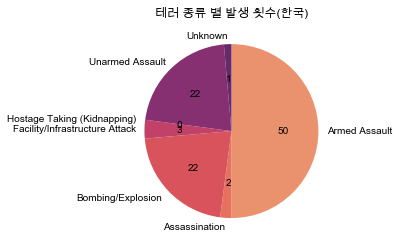

In [586]:
# 한국에서 발생한 테러 종류 원형차트
labels=kor_attack_type.attacktype1_txt
colors = sns.color_palette('flare',len(labels))
plt.pie(kor_attack_type.ncasualty, labels=labels, autopct='%.0f',startangle=90, counterclock=False, colors=colors)
plt.title("테러 종류 별 사상자 횟수(한국)")
plt.show()

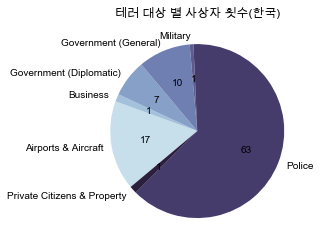

In [595]:
# 한국에서 발생한 테러 대상 원형차트
labels=kor_targ_type.targtype1_txt
colors = sns.color_palette('ch:s=.25,rot=-.25',len(labels))
plt.pie(kor_targ_type.ncasualty, labels=labels, autopct='%.0f',startangle=220, counterclock=False, colors=colors)
plt.title("테러 대상 별 사상자 횟수(한국)")
plt.show()

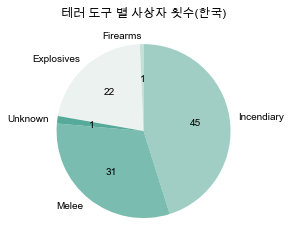

In [603]:
# 한국에서 발생한 테러 도구 별 원형차트
labels=kor_weap_type.weaptype1_txt
colors = sns.color_palette('light:#5A9',len(labels))
plt.pie(kor_weap_type.ncasualty, labels=labels, autopct='%.0f',startangle=170, counterclock=False, colors=colors)
plt.title("테러 도구 별 사상자 횟수(한국)")
plt.show()

---

#
안문주. 본인은 이번 문제와 문제의 답을 외부로 유출하지 않겠습니다.